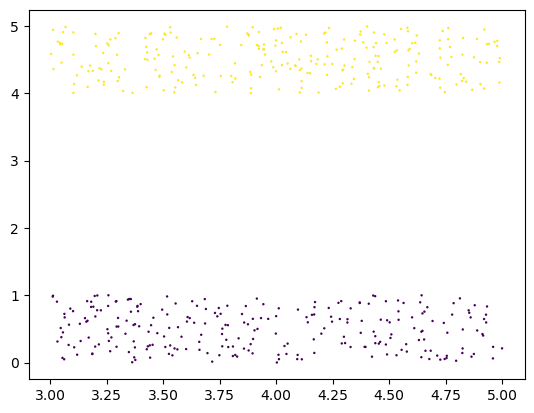

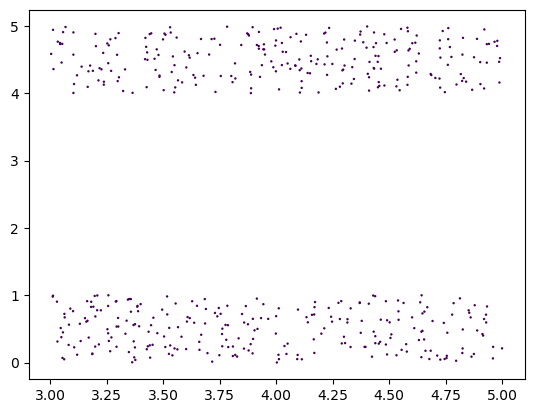

In [10]:
import pylab as pl
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist,squareform
 
# box size
L=5.
threshold=0.3
# create data
X=pl.uniform(-1,1, size=(500,2))
# create for corners
X[:,0]-=1
X[X<0]+=L
 
# finding clusters, no periodic boundaries
db=DBSCAN(eps=threshold).fit(X)
 
pl.scatter(X[:,0], X[:,1],c=db.labels_, s=3,edgecolors='None')
pl.figure()
 
# 1) find the correct distance matrix
for d in range(X.shape[1]):
    # find all 1-d distances
    pd=pdist(X[:,d].reshape(X.shape[0],1))
    # apply boundary conditions
    pd[pd>L*0.5]-=L
     
    try:
        # sum
        total+=pd**2
    except Exception as e:
        # or define the sum if not previously defined
        total=pd**2
# transform the condensed distance matrix...
total=pl.sqrt(total)
# ...into a square distance matrix
square=squareform(total)
db=DBSCAN(eps=threshold, metric='precomputed').fit(square)
pl.scatter(X[:,0], X[:,1],c=db.labels_,s=3, edgecolors='None')
pl.show()